In [116]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import norm

import sys 
sys.path.insert(0, "../src")
from BrusselsMap import BrusselsMap
from GeoJsonHandler import GeoJsonHandler
from OSMGeoJsonHandler import OSMGeoJsonHandler

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
r_path = r"../data/osm/overpass-turbo/shops.geojson"
path = os.path.join(os.getcwd(), r_path)

shops = OSMGeoJsonHandler(r_path, feature_type='shop')

In [119]:
shops.gdf['AREA'] = shops.gdf['AREA']*1e6
shops.gdf

,ID,TYPE,NAME,geometry,AREA,LAT,LON
0,5659588,relation,Carrefour Market Evere Paduwa,"MULTIPOLYGON (((4.41267 50.85954, 4.41267 50.8...",1930.093927,50.859269,4.413116
1,13855573,way,Espace Louise,"POLYGON ((4.35745 50.83558, 4.35750 50.83595, ...",2923.322342,50.835724,4.357245
2,21508474,way,Delhaize Proxy,"POLYGON ((4.35433 50.83472, 4.35411 50.83463, ...",572.903491,50.834554,4.354341
3,22947626,way,Colruyt,"POLYGON ((4.43190 50.83601, 4.43242 50.83595, ...",2662.109096,50.836295,4.432252
4,28885014,way,Renault,"POLYGON ((4.39488 50.81782, 4.39496 50.81786, ...",2019.536377,50.818140,4.394888
...,...,...,...,...,...,...,...
4505,9245002498,node,Dety Garage Toyota,POINT (4.40304 50.83277),0.000000,50.832769,4.403043
4506,9245565845,node,Crossword,POINT (4.35822 50.83228),0.000000,50.832277,4.358215
4507,9246533801,node,Mid Century Modern Interieur,POINT (4.35638 50.82146),0.000000,50.821459,4.356377
4508,9249034796,node,Tropic Flower,POINT (4.39456 50.85141),0.000000,50.851411,4.394561


In [120]:
shops.gdf.sort_values(by='AREA', ascending=False).tail(50)

,ID,TYPE,NAME,geometry,AREA,LAT,LON
1763,4348611939,node,Tollet,POINT (4.35241 50.84911),0.0,50.849115,4.352411
1764,4348611940,node,Pearle,POINT (4.35253 50.84922),0.0,50.849216,4.352528
1766,4348611942,node,Dr. Martens,POINT (4.35261 50.84929),0.0,50.849293,4.352612
1750,4333115574,node,O Bag Store,POINT (4.35276 50.84919),0.0,50.849194,4.352763
1767,4348611943,node,BASE,POINT (4.35265 50.84934),0.0,50.849341,4.352650
1768,4348631524,node,Tequila,POINT (4.35143 50.84801),0.0,50.848014,4.351427
1769,4348631526,node,L'Âme du Chocolat,POINT (4.35140 50.84816),0.0,50.848156,4.351402
1770,4348631527,node,Le Petit Normand,POINT (4.35163 50.84810),0.0,50.848096,4.351628
1771,4348631532,node,Tobacco & Press,POINT (4.35147 50.84821),0.0,50.848211,4.351472
1772,4348631533,node,Bruxelles Accueil Porte Ouverte - Brussel Onth...,POINT (4.35167 50.84811),0.0,50.848114,4.351672


## Filling missing areas

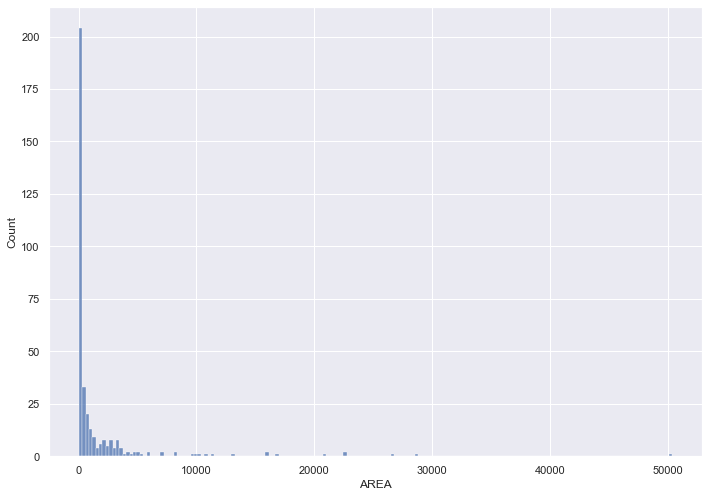

In [121]:
# sns.histplot(np.log(shops.gdf[shops.gdf["AREA"] != 0].sort_values(by="AREA", ascending=False)["AREA"]))
plot = sns.histplot(shops.gdf[shops.gdf["AREA"] != 0].sort_values(by="AREA", ascending=False)["AREA"])
# Save fig
r_path = r"../data/osm/overpass-turbo/img/shops-raw.png"
fig = plot.get_figure()
fig.savefig(r_path) 

In [122]:
# Select areas and apply k-means clustering
nbr_clusters = 4
# X = np.array(shops.gdf[shops.gdf["AREA"] != 0].sort_values(by="AREA", ascending=False)["AREA"]).reshape(-1,1)[1:]
X = np.log(np.array(shops.gdf[shops.gdf["AREA"] != 0]["AREA"]).reshape(-1,1))
means = KMeans(n_clusters=nbr_clusters, random_state=0).fit(X)

In [123]:
means.labels_

array([0, 0, 3, 0, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0,
       1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       3, 1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 1, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2,
       3, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 0, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 1, 1, 3, 1, 1, 3, 0, 3, 1, 1, 1, 3, 1, 3,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 1, 3, 1, 0, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 0, 2, 0,
       1, 1, 1, 0, 1, 3, 1, 2, 3, 3, 1, 0, 3, 3, 1, 0, 1, 0, 2, 0, 3, 2,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 3, 0,
       3, 0, 1, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 1, 1, 1, 1, 3, 0, 1, 3, 0,
       3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

<AxesSubplot:>

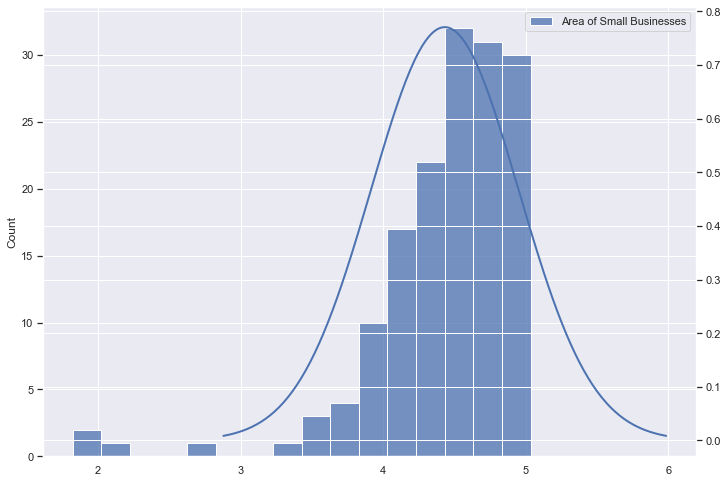

In [124]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()

data = X[(means.labels_ == 1)]
plot = sns.histplot(data)
# plt.title("Area repartition for Small Businesses")
plt.legend(labels=['Area of Small Businesses'])

ax2 = plt.twinx()

#Fit & Plot Gaussian Distribution
mu, std = norm.fit(data)
x = np.linspace(mu-3*std, mu+3*std, 200)
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, ax=ax2, linewidth=2)

# Save fig
# r_path = r"../data/osm/overpass-turbo/img/shops.png"
# fig = plot.get_figure()
# fig.savefig(r_path) 

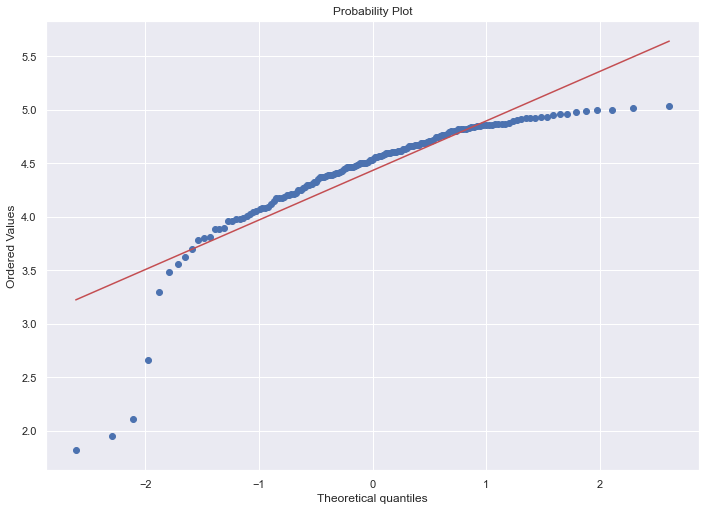

In [125]:
# Check the fit
import pylab 
import scipy.stats as stats

stats.probplot(data.reshape(-1), dist="norm", plot=pylab)
pylab.show()

(!!!) We could fit a probability distribution on these samples and then draw samples for missing values to reconstruct and not completely destroy the 400 points distribution. (as we have a total of 4500 data points)

In [126]:
len(X)

356

We take the median to get a good estimation of the area of small businesses

In [127]:
for i in range(nbr_clusters):
    points = X[means.labels_ == i]
    median = np.median(points)
    mean = np.mean(points)    
    q1 = np.percentile(points, 25)
    q3 = np.percentile(points, 75)
    
    print(f"Median for cluster {i}: ", np.exp(mean)) 
    print(f"Mean for cluster {i}: ", np.exp(median)) 
    print(f"Q1 for cluster {i}: ", np.exp(q1)) 
    print(f"Q3 for cluster {i}: ", np.exp(q3)) 
    print(f"Cluster Size {i}: ", len(points))
    
    print("----")
    

Median for cluster 0:  1775.7883041101518
Mean for cluster 0:  1977.3323826025448
Q1 for cluster 0:  1120.835404845508
Q3 for cluster 0:  2759.042419993688
Cluster Size 0:  85
----
Median for cluster 1:  84.08751965106974
Mean for cluster 1:  93.3588059428559
Q1 for cluster 1:  68.74593757415371
Q3 for cluster 1:  119.55419916080855
Cluster Size 1:  154
----
Median for cluster 2:  10924.778167315497
Mean for cluster 2:  10101.631812092235
Q1 for cluster 2:  6142.68826422723
Q3 for cluster 2:  16637.1799349597
Cluster Size 2:  26
----
Median for cluster 3:  296.71188179097504
Mean for cluster 3:  262.7182503636323
Q1 for cluster 3:  206.17627668465695
Q3 for cluster 3:  415.6611305159015
Cluster Size 3:  91
----


Now, let's see which shop is in which cluster:

In [128]:
means.labels_

array([0, 0, 3, 0, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0,
       1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       3, 1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 1, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2,
       3, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 0, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 1, 1, 3, 1, 1, 3, 0, 3, 1, 1, 1, 3, 1, 3,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 1, 3, 1, 0, 1, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 3, 0, 2, 0,
       1, 1, 1, 0, 1, 3, 1, 2, 3, 3, 1, 0, 3, 3, 1, 0, 1, 0, 2, 0, 3, 2,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 3, 0,
       3, 0, 1, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 1, 1, 1, 1, 3, 0, 1, 3, 0,
       3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 3, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [131]:
idx = (means.labels_ == 1) | (means.labels_ == 3)
shops.gdf[shops.gdf["AREA"] != 0].iloc[idx].sort_values(by='AREA', ascending=False).head()

,ID,TYPE,NAME,geometry,AREA,LAT,LON
262,255768107,way,NaN,"POLYGON ((4.29714 50.84661, 4.29715 50.84652, ...",695.696778,50.846456,4.297293
151,225653467,way,NaN,"POLYGON ((4.43301 50.84868, 4.43298 50.84862, ...",670.893247,50.848479,4.433049
344,840120623,way,IMP Bike,"POLYGON ((4.41367 50.85635, 4.41360 50.85632, ...",638.018745,50.856187,4.413862
340,745450561,way,Total,"POLYGON ((4.30421 50.81592, 4.30451 50.81593, ...",637.251635,50.816033,4.304295
98,155848281,way,L' Armée du Salut,"POLYGON ((4.34649 50.85609, 4.34664 50.85610, ...",629.348523,50.856219,4.346452


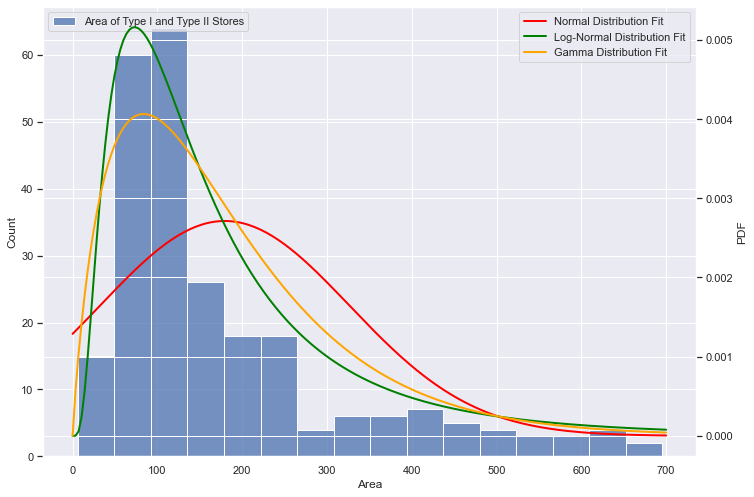

In [253]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()

data = np.exp(X[ (means.labels_ == 1) | (means.labels_ == 3)]).reshape(-1) #log normal data

fig, ax = plt.subplots()
plot = sns.histplot(data, label='Area of Type I and Type II Stores')

ax2 = plt.twinx()

#Fit & Plot Gaussian Distribution
mu, std = norm.fit(data)
x=np.linspace(0, 700, 200)
p = norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, ax=ax2, linewidth=2, color='red', label="Normal Distribution Fit")

# Fit a log Normal Distribution
logdata = X[ (means.labels_ == 1)].reshape(-1)
param= stats.lognorm.fit(data, floc=0)
x=np.linspace(0, 700, 200)
log_p = stats.lognorm.pdf(x, param[0], loc=param[1], scale=param[2])
sns.lineplot(x=x, y=log_p, ax=ax2, linewidth=2, color='green', label="Log-Normal Distribution Fit")

# Fit a Gamma Distribution
fit_alpha, fit_loc, fit_beta= stats.gamma.fit(data, floc=0)
gamma_p = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
sns.lineplot(x=x, y=gamma_p, ax=ax2, linewidth=2, color='orange', label="Gamma Distribution Fit")


#Legends and Labels
ax.legend(loc="upper left")
ax2.legend()
ax.set(xlabel="Area", ylabel = "Count")
ax2.set(ylabel = "PDF")


# Save fig
r_path = r"../data/osm/overpass-turbo/img/shops-TypeI-Gaussian.png"
fig = plot.get_figure()
fig.savefig(r_path) 

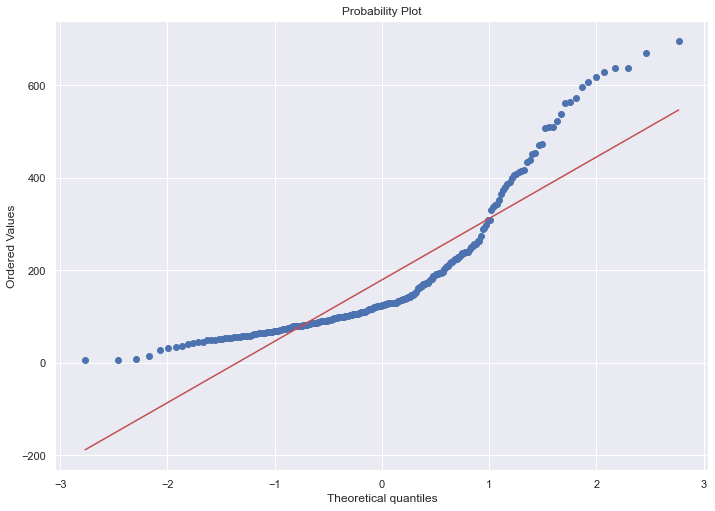

In [270]:
# Check the fit
import pylab 
import scipy.stats as stats

fig = stats.probplot(data.reshape(-1), dist="norm", plot=pylab)

# Save fig
r_path = r"../data/osm/overpass-turbo/img/QQplot-Norm.png"
pylab.savefig(r_path) 

pylab.show()

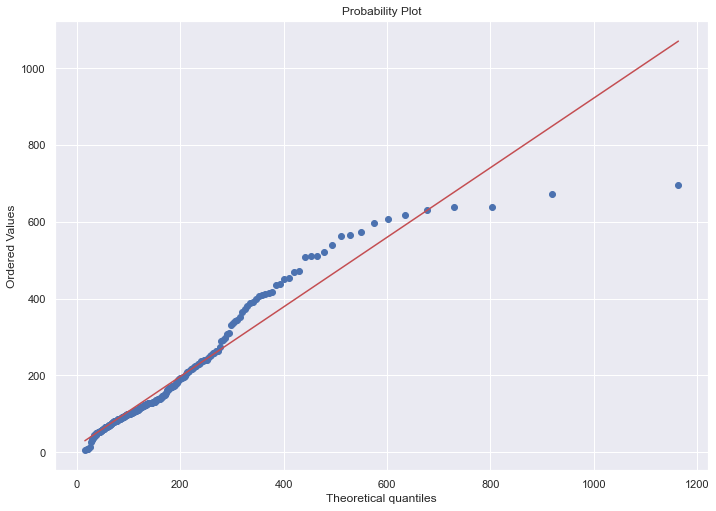

<Figure size 842.4x595.44 with 0 Axes>

In [277]:
shape, loc, scale = stats.lognorm.fit(data, floc=0)

fig, ax = plt.subplots()
stats.probplot(data, fit=True, dist=stats.lognorm, sparams=(shape, loc, scale), plot=ax)
plt.show()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Save fig
r_path = r"../data/osm/overpass-turbo/img/QQplot-LogNorm.png"
pylab.savefig(r_path) 

pylab.show()

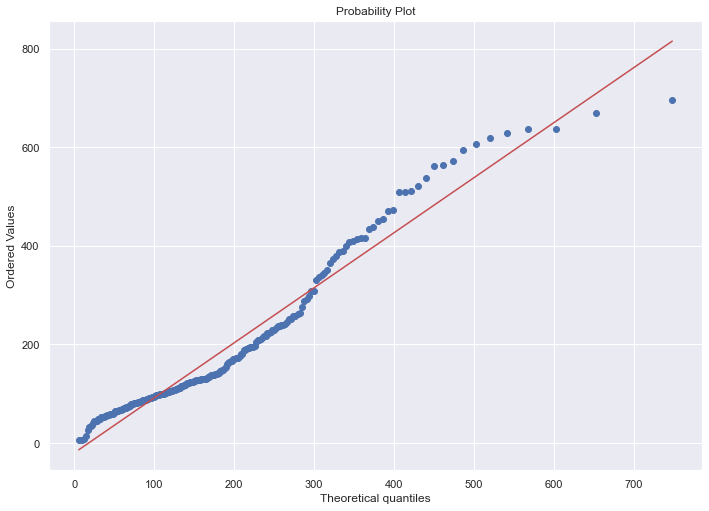

<Figure size 842.4x595.44 with 0 Axes>

In [278]:
shape, loc, scale = stats.gamma.fit(data, floc=0)

fig, ax = plt.subplots()
stats.probplot(data, fit=True, dist=stats.gamma, sparams=(shape, loc, scale), plot=ax)
plt.show()

# Save fig
r_path = r"../data/osm/overpass-turbo/img/QQplot-Gamma.png"
pylab.savefig(r_path) 

pylab.show()

In [282]:
from scipy.stats import kstest, norm

print(stats.kstest(data, "norm"))
print(stats.kstest(data, "lognorm", param))
print(stats.kstest(data, "gamma", param))


KstestResult(statistic=0.9999999996737867, pvalue=0.0)
KstestResult(statistic=0.07342403987621615, pvalue=0.13552929151688742)
KstestResult(statistic=0.3772853350058448, pvalue=7.696081143576339e-32)


In [298]:
lognormal_params = (0.7802219080175542, 0.0, 134.31579568422393)
print(lognormal_params)

(0.7802219080175542, 0.0, 134.31579568422393)


In [285]:
# shops.gdf["AREA"].replace(0, median, inplace=True)

### Randomly generating a log-normal distribution

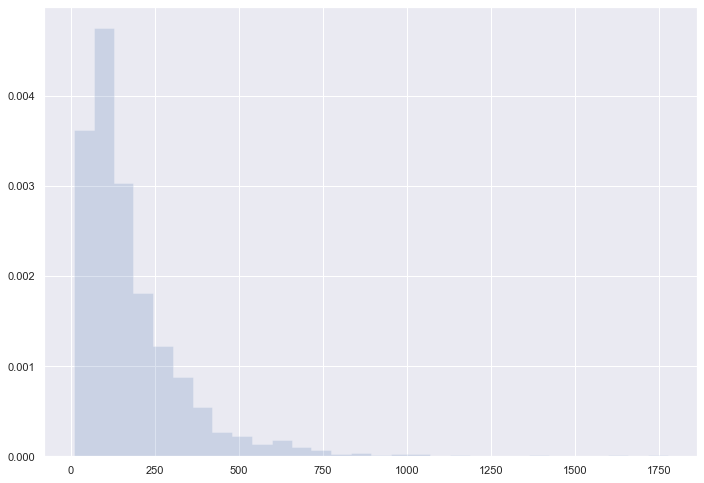

In [321]:
r = stats.lognorm.rvs(lognormal_params[0], lognormal_params[1], lognormal_params[2], size=1500)

fig, ax = plt.subplots()
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=30)
plt.show()

In [317]:
shops.gdf["AREA"] = shops.gdf["AREA"].apply(
    lambda x: stats.lognorm.rvs(
        lognormal_params[0], lognormal_params[1], lognormal_params[2]
    )
    if x == 0
    else x
)

In [318]:
print(len(shops.gdf[shops.gdf["AREA"] == 0]))
print(len(shops.gdf[shops.gdf["AREA"] != 0]))
sum(shops.gdf["AREA"].isna())

0
4510


0

Now, we assume that supermarkets and hypermarkets are well labeled, which means that the small shops need to be averaged by a probabilistic distribution.

## Attribution de la surface

Data validation: surface moyenne d'une supérette 

- Total supérettes: 139
- Total superficie: 28 000 $m^2$
- Superficie moyenne d'une supérette $ = \frac{28000}{139} = 200 m^2$

Source: https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=ee13b6f2-5114-4761-b6c5-a869ab57e859

In [204]:
shops.gdf

,ID,TYPE,NAME,geometry,AREA,LAT,LON
0,5659588,relation,Carrefour Market Evere Paduwa,"MULTIPOLYGON (((4.41267 50.85954, 4.41267 50.8...",1930.093927,50.859269,4.413116
1,13855573,way,Espace Louise,"POLYGON ((4.35745 50.83558, 4.35750 50.83595, ...",2923.322342,50.835724,4.357245
2,21508474,way,Delhaize Proxy,"POLYGON ((4.35433 50.83472, 4.35411 50.83463, ...",572.903491,50.834554,4.354341
3,22947626,way,Colruyt,"POLYGON ((4.43190 50.83601, 4.43242 50.83595, ...",2662.109096,50.836295,4.432252
4,28885014,way,Renault,"POLYGON ((4.39488 50.81782, 4.39496 50.81786, ...",2019.536377,50.818140,4.394888
...,...,...,...,...,...,...,...
4505,9245002498,node,Dety Garage Toyota,POINT (4.40304 50.83277),0.000000,50.832769,4.403043
4506,9245565845,node,Crossword,POINT (4.35822 50.83228),0.000000,50.832277,4.358215
4507,9246533801,node,Mid Century Modern Interieur,POINT (4.35638 50.82146),0.000000,50.821459,4.356377
4508,9249034796,node,Tropic Flower,POINT (4.39456 50.85141),0.000000,50.851411,4.394561


## Neighborhood assignation
Now, let's assign each shop to a neighborhood

In [322]:
#Load geodata
r_path = r"../data/final_data/sector.json"
path = os.path.join(os.getcwd(), r_path)
sectors = GeoJsonHandler(path, "NAME_FRE")

In [323]:
shops.assign_ngh(sectors)

  0%|                                                                                                                                     | 0/4510 [00:00<?, ?it/s]C:\Users\vic_t\Anaconda3\envs\mfe_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4510/4510 [03:06<00:00, 24.23it/s]


In [324]:
shops.gdf['AMENITY'] = 'Shop'
shops.gdf = shops.gdf[['ID', 'TYPE', 'NAME', 'AMENITY', 'geometry', 'AREA', 'LAT', 'LON', 'NAME_FRE']]

In [325]:
shops.gdf

,ID,TYPE,NAME,AMENITY,geometry,AREA,LAT,LON,NAME_FRE
0,5659588,relation,Carrefour Market Evere Paduwa,Shop,"MULTIPOLYGON (((4.41267 50.85954, 4.41267 50.8...",1930.093927,50.859269,4.413116,PADUWA
1,13855573,way,Espace Louise,Shop,"POLYGON ((4.35745 50.83558, 4.35750 50.83595, ...",2923.322342,50.835724,4.357245,LOUISE - LONGUE HAIE
2,21508474,way,Delhaize Proxy,Shop,"POLYGON ((4.35433 50.83472, 4.35411 50.83463, ...",572.903491,50.834554,4.354341,BERCKMANS - HOTEL DES MONNAIES
3,22947626,way,Colruyt,Shop,"POLYGON ((4.43190 50.83601, 4.43242 50.83595, ...",2662.109096,50.836295,4.432252,BOULEVARD DE LA WOLUWE
4,28885014,way,Renault,Shop,"POLYGON ((4.39488 50.81782, 4.39496 50.81786, ...",2019.536377,50.818140,4.394888,UNIVERSITE
...,...,...,...,...,...,...,...,...,...
4505,9245002498,node,Dety Garage Toyota,Shop,POINT (4.40304 50.83277),97.184312,50.832769,4.403043,SAINT-MICHEL
4506,9245565845,node,Crossword,Shop,POINT (4.35822 50.83228),381.618650,50.832277,4.358215,CHATELAIN
4507,9246533801,node,Mid Century Modern Interieur,Shop,POINT (4.35638 50.82146),274.243528,50.821459,4.356377,BRUGMANN - LEPOUTRE
4508,9249034796,node,Tropic Flower,Shop,POINT (4.39456 50.85141),113.957924,50.851411,4.394561,PLASKY


In [326]:
r_path = r"../data/final_data/osm/shop.csv"
path = os.path.join(os.getcwd(), r_path)

shops.gdf.to_csv(path, sep=',', encoding='utf-8-sig', index=False, chunksize=10000)